In [52]:
df <- read.delim('../Materials/Binomial_prep.csv', sep=',', header=TRUE)

In [53]:
#Two new binary columns whether a production is Dutch (True/False) or German (True/False)
df$Dutch <- as.integer(as.logical(df$Dutch))
df$German <- as.integer(as.logical(df$German))
df$Multiple.bill <- as.integer(as.logical(df$Multiple.bill)) 
colnames(df)[1] <- "Collection"
head(df)

Collection,Date,World.premiere,Genre,Directors,Normalised.title,Composer,Multiple.bill,Occasion,Dutch,German
1893-1897,1893-10-03,1821,romantische oper,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,0,N,0,1
1893-1897,1893-10-05,1871,romantische oper,Edward Keurvels & Henry Fontaine,Willem Tell,Carl Reinecke,0,N,0,1
1893-1897,1893-10-10,1821,romantische oper,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,0,N,0,1
1893-1897,1893-10-12,1871,romantische oper,Edward Keurvels & Henry Fontaine,Willem Tell,Carl Reinecke,0,N,0,1
1893-1897,1893-11-16,?,lyrisch drama,Edward Keurvels & Henry Fontaine,Charlotte Corday,Peter Benoit,0,N,1,0
1893-1897,1893-10-17,1821,romantische oper,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,0,N,0,1


In [54]:
#Make sure that columns are interpreted as factors

df$Collection <- factor(df$Collection, ordered = TRUE)
df$Composer <- as.factor(df$Composer)
df$Normalised.title <- as.factor(df$Normalised.title)
df$World.premiere <- as.factor(df$World.premiere)
df$Genre <- as.factor(df$Genre)
df$Occasion <- as.factor(df$Occasion)

head(df)

Collection,Date,World.premiere,Genre,Directors,Normalised.title,Composer,Multiple.bill,Occasion,Dutch,German
1893-1897,1893-10-03,1821,romantische oper,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,0,N,0,1
1893-1897,1893-10-05,1871,romantische oper,Edward Keurvels & Henry Fontaine,Willem Tell,Carl Reinecke,0,N,0,1
1893-1897,1893-10-10,1821,romantische oper,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,0,N,0,1
1893-1897,1893-10-12,1871,romantische oper,Edward Keurvels & Henry Fontaine,Willem Tell,Carl Reinecke,0,N,0,1
1893-1897,1893-11-16,?,lyrisch drama,Edward Keurvels & Henry Fontaine,Charlotte Corday,Peter Benoit,0,N,1,0
1893-1897,1893-10-17,1821,romantische oper,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,0,N,0,1


In [61]:
str(df)
#Import relevant libraries
library(lme4)
library(effects) 
library(ggplot2)

'data.frame':	4470 obs. of  11 variables:
 $ Collection      : Ord.factor w/ 31 levels "1893-1897"<"1897-1900"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Date            : Factor w/ 3384 levels "?","01/01/1901",..: 1773 1774 1775 1776 1786 1777 1778 1779 1780 1781 ...
 $ World.premiere  : Factor w/ 103 levels "","?","1608",..: 16 49 16 49 2 16 2 16 2 16 ...
 $ Genre           : Factor w/ 86 levels "","?","ballet",..: 69 69 69 69 35 69 35 69 35 69 ...
 $ Directors       : Factor w/ 7 levels "Edward Keurvels & Henry Fontaine",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Normalised.title: Factor w/ 324 levels "'T Minnebrugje",..: 107 316 107 316 22 107 22 107 22 107 ...
 $ Composer        : Factor w/ 193 levels "","?","?ile Mathieu",..: 37 39 37 39 163 37 163 37 163 37 ...
 $ Multiple.bill   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Occasion        : Factor w/ 3 levels "G","N","P": 2 2 2 2 2 2 2 2 2 2 ...
 $ Dutch           : int  0 0 0 0 1 0 1 0 1 0 ...
 $ German          : int  1 1 1 1 0 1 0 1 0 1 ...


In [24]:
#Model 1 models the expected amount of original Dutch performances across the operatic seasons.
m1 <- glm(Dutch ~ Collection, data = df, family = binomial)
summary(m1)


Call:
glm(formula = Dutch ~ Collection, family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6562  -0.6992  -0.4972  -0.2762   2.8267  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -1.33442    0.04473 -29.830  < 2e-16 ***
Collection.L  -4.51296    0.28744 -15.701  < 2e-16 ***
Collection.Q  -1.47768    0.29990  -4.927 8.34e-07 ***
Collection.C   0.17722    0.30134   0.588 0.556465    
Collection^4  -1.17289    0.30226  -3.880 0.000104 ***
Collection^5   0.68103    0.29972   2.272 0.023071 *  
Collection^6  -1.17128    0.29506  -3.970 7.20e-05 ***
Collection^7  -0.69893    0.28122  -2.485 0.012942 *  
Collection^8   0.56111    0.25651   2.188 0.028705 *  
Collection^9   0.03762    0.24760   0.152 0.879243    
Collection^10 -0.05768    0.23952  -0.241 0.809697    
Collection^11 -1.05280    0.23764  -4.430 9.42e-06 ***
Collection^12 -0.10918    0.24851  -0.439 0.660425    
Collection^13 -0.46060    0.24

In [25]:
4044.9 / 4439 <= 1.4

[1] TRUE

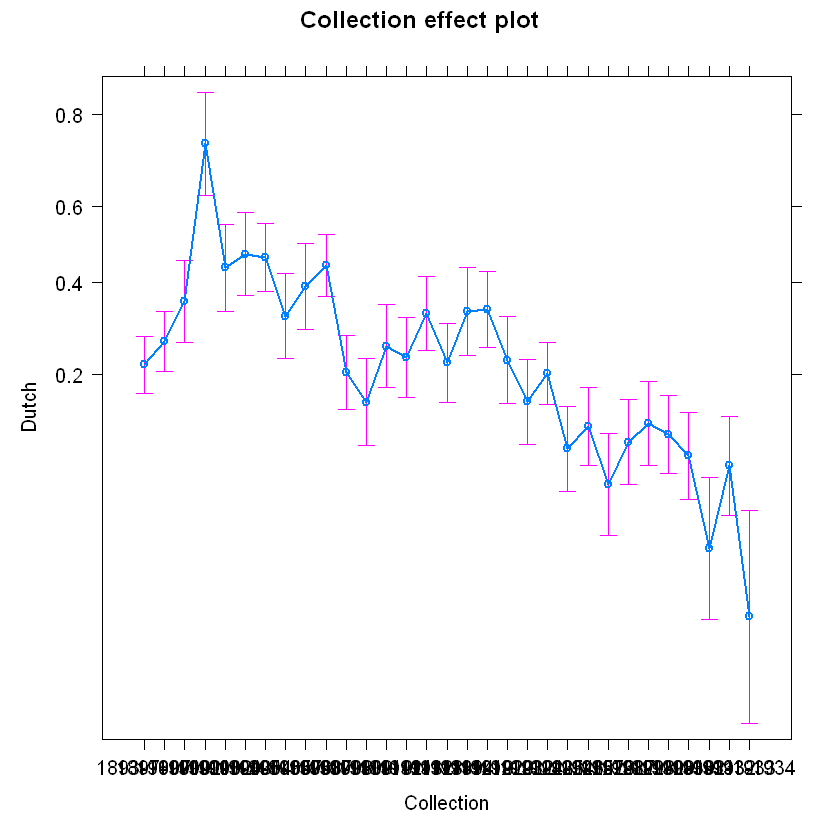

In [94]:
#Decreases over time

m1 <- glm(Dutch ~ Collection, data = df, family = binomial)

plot(effect("Collection", m1), strip.text.x = element_text(angle = -90))


In [27]:
#Model 2: Modelleert het aantal Nederlandstalige opvoeringen met COmposer als een random effect.
model2 <- glmer(Dutch ~ Collection + (1|Composer), data = df, family = binomial())
plot(effect("Occasion", model2))
#is het logisch om een composer als random effect te gebruiken? Een random effect gaat ervan uit dat de componist een andere baseline heeft
#voor de probability voor het produceren van een Nederlands stuk, maar elke componist in de dataset componeert eigenlijk maar in één taal.
#dus die kans is dus eigenlijk 0 of 1? 

Warning message in (function (fn, par, lower = rep.int(-Inf, n), upper = rep.int(Inf, :
"failure to converge in 10000 evaluations"Warning message in optwrap(optimizer, devfun, start, rho$lower, control = control, :
"convergence code 4 from Nelder_Mead: failure to converge in 10000 evaluations"Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge with max|grad| = 4.23184 (tol = 0.002, component 1)"

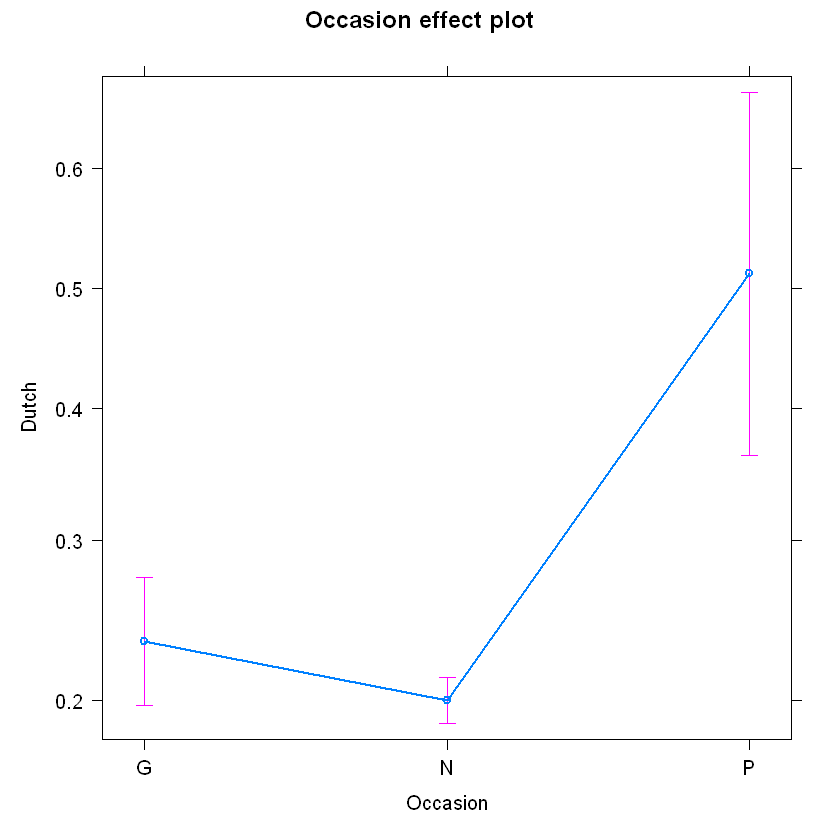

In [28]:
#Model 3: Models the probablity of the type of special occasion given that the production is Dutch

m3 <- glm(Dutch ~ Occasion, data = df, family = binomial)
plot(effect("Occasion", m4))

#Grotere kans dat het een nederlands werk is bij een volksvertoning
#iets grotere kans dat het nederlands is bij een gala vertoning
#minste kans dat het een nederlandse vertoning is bij een 'neutrale' vertoning

#G = gala
#P = popular
#N = neutraal

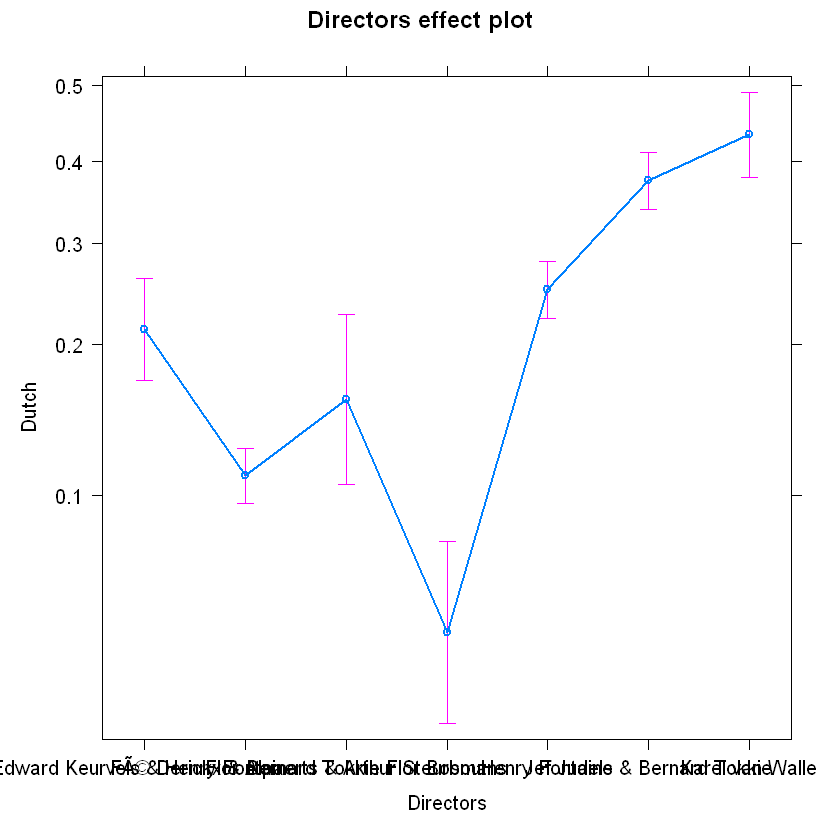

In [29]:
#Model 4: Which director(s) were most probable to produce original Dutch productions.
m4 <- glm(Dutch ~ Directors, data = df, family = binomial)
plot(effect("Directors", m7))



## We try the same but this time with German productions

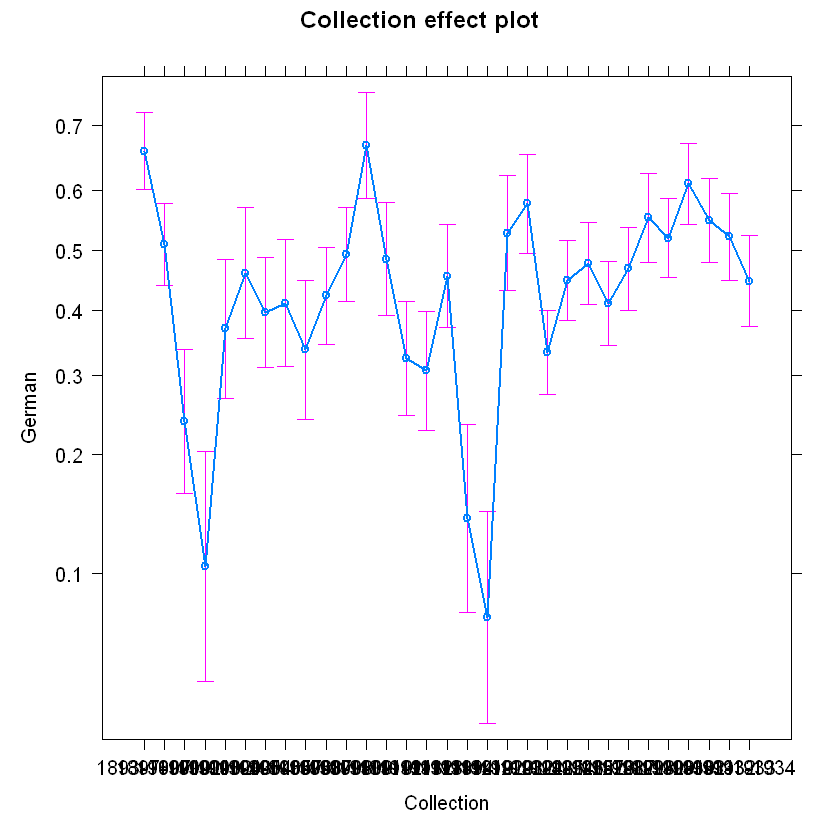

In [ ]:
#Model 5: the effect of the Collection on the probability of the outcome "German"
m5_german <- glm(German ~ Collection, data = df, family = binomial)

plot(effect("Collection", m1_german))



Warning message in (function (fn, par, lower = rep.int(-Inf, n), upper = rep.int(Inf, :
"failure to converge in 10000 evaluations"Warning message in optwrap(optimizer, devfun, start, rho$lower, control = control, :
"convergence code 4 from Nelder_Mead: failure to converge in 10000 evaluations"Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge with max|grad| = 4.09518 (tol = 0.002, component 1)"

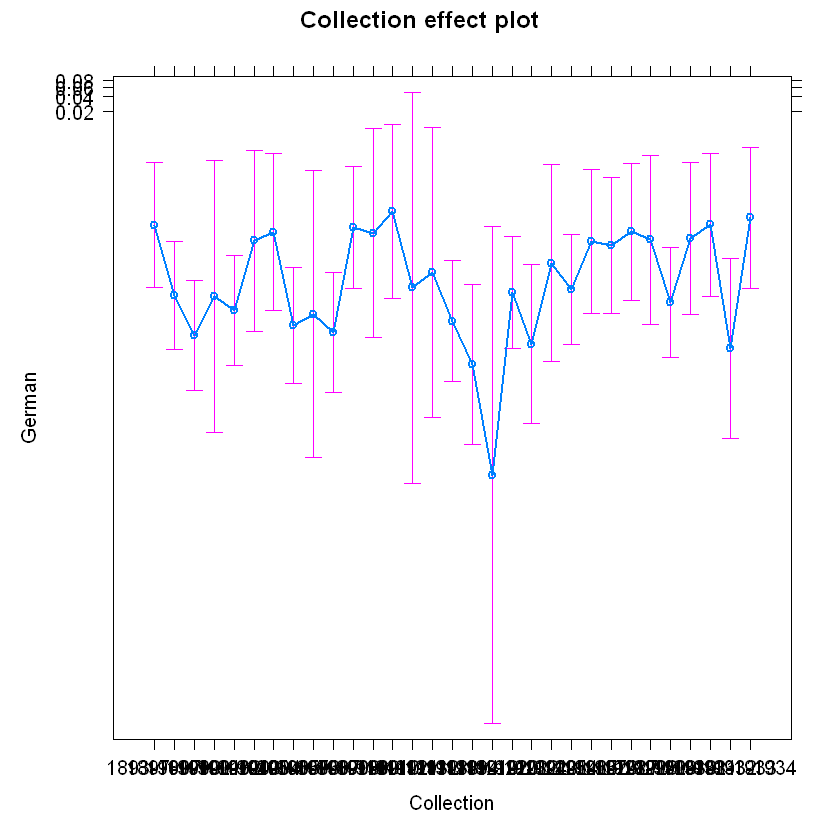

In [100]:
#Model 6: add composer as random effect,

m6 <- glmer(German ~ Collection + (1|Composer), data = df, family = binomial())

plot(effect("Collection", m6))

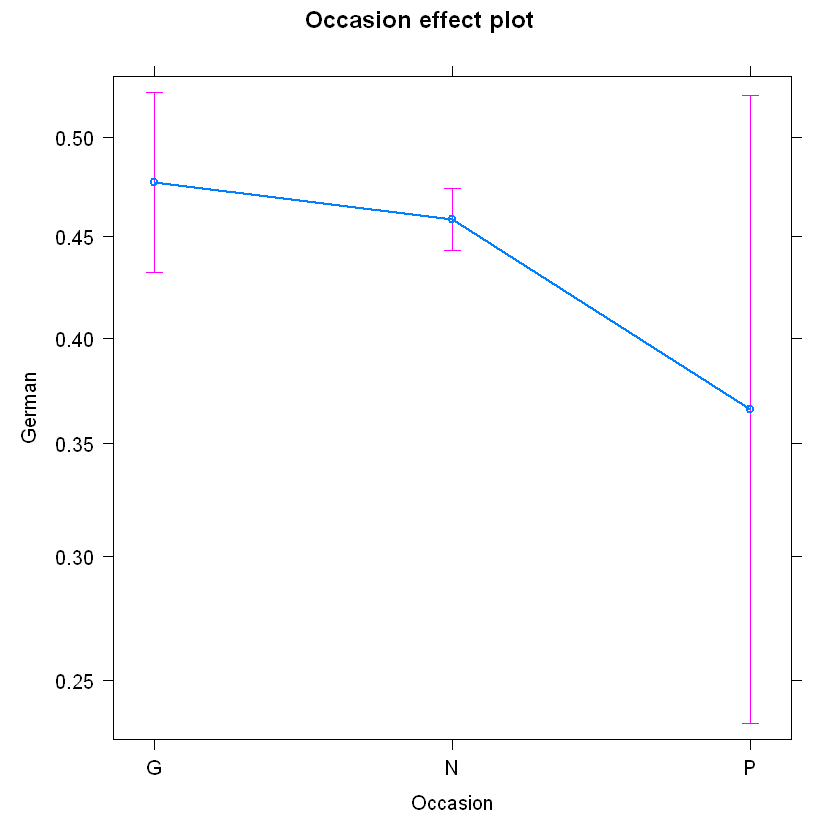

In [ ]:
#Model 7: the effect of the special occasion ant the probability of it being a German performance

G7 <- glm(German ~ Occasion, data = df, family = binomial)
plot(effect("Occasion", G1))

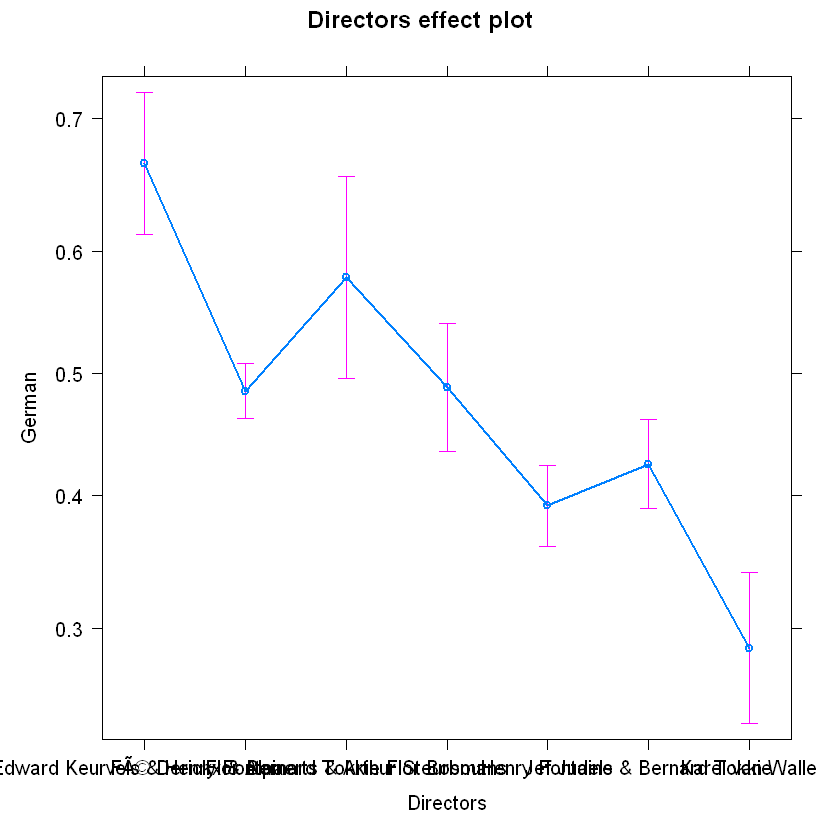

In [96]:
#Model 7: the effect of the Director(s) and the probability of producing a German performances

G_Directors <- glm(German ~ Directors, data = df, family = binomial)
plot(effect("Directors", G_Directors))


## What happens when we delete Wagner from the dataset?

In [97]:
#remove all rows that contain Wagner in the 'Composer column'
df2 <- df[!grepl("Wagner", df$Composer), ]
print(nrow(df))
print(nrow(df2))

[1] 4470
[1] 3770


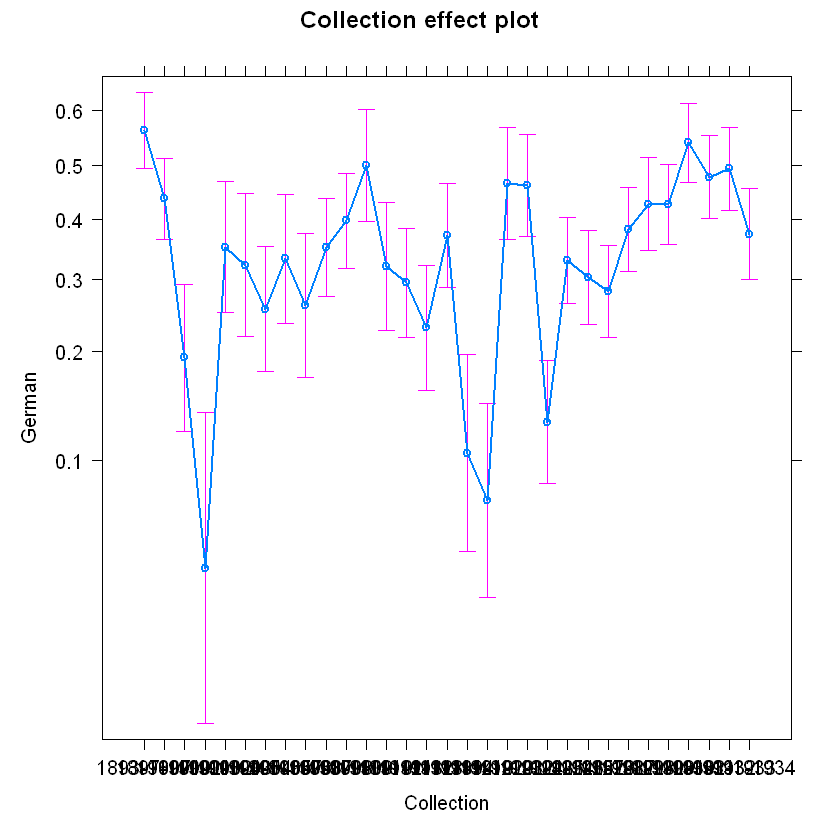

In [98]:
m1_german <- glm(German ~ Collection, data = df2, family = binomial)

plot(effect("Collection", m1_german))


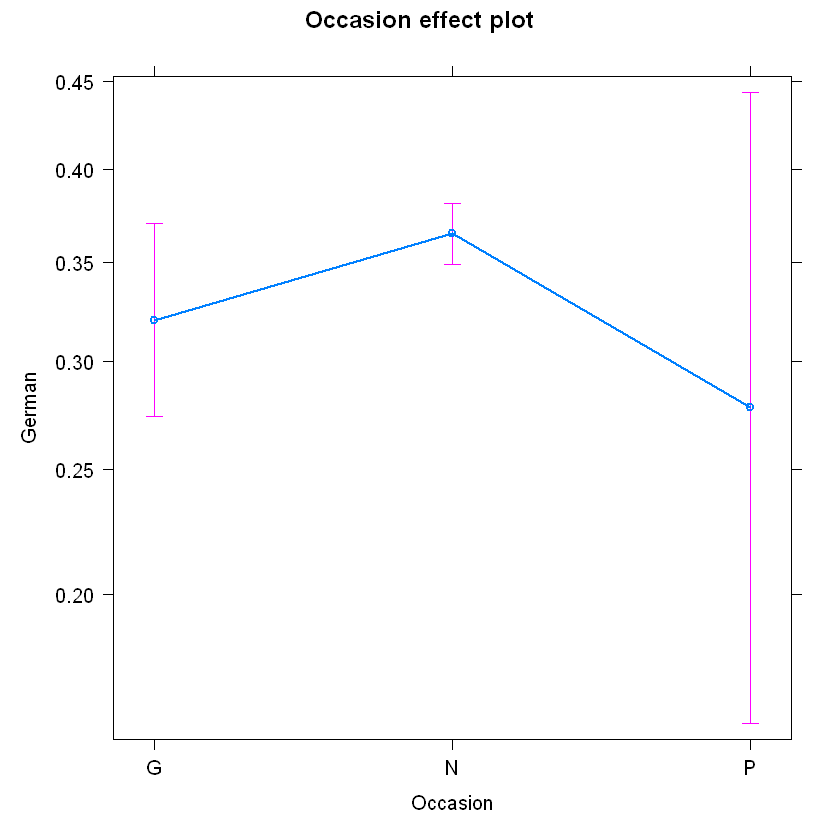

In [99]:
#The German preference for Gala-performances seems to dissapear when taking Wagner out of the equation.
G_occ_nowag <- glm(German ~ Occasion, data = df2, family = binomial)
plot(effect("Occasion", G_occ_nowag))

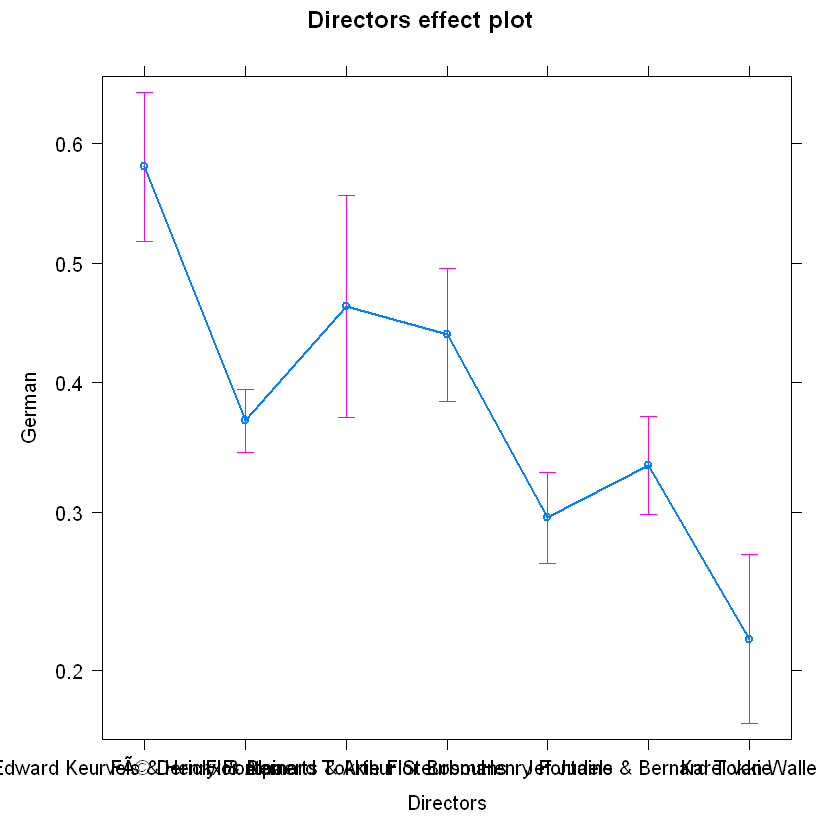

In [103]:
G_Directors_nowag <- glm(German ~ Directors, data = df2, family = binomial)
plot(effect("Directors", G_Directors_nowag))